In [1]:
import numpy as np  # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle



from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

import keras
from keras.utils import np_utils
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *
from keras.callbacks import *

In [20]:

benign=pd.read_csv('1.benign.csv')
g_c=pd.read_csv('1.gafgyt.combo.csv')
g_j=pd.read_csv('1.gafgyt.junk.csv')
g_s=pd.read_csv('1.gafgyt.scan.csv')
g_t=pd.read_csv('1.gafgyt.tcp.csv')
g_u=pd.read_csv('1.gafgyt.udp.csv')
m_a=pd.read_csv('1.mirai.ack.csv')
m_sc=pd.read_csv('1.mirai.scan.csv')
m_sy=pd.read_csv('1.mirai.syn.csv')
m_u=pd.read_csv('1.mirai.udp.csv')
m_u_p=pd.read_csv('1.mirai.udpplain.csv')

In [21]:
benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

In [22]:
data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [23]:
data.groupby('type')['type'].count()

type
benign             49548
gafgyt_combo       59718
gafgyt_junk        29068
gafgyt_scan        29849
gafgyt_tcp         92141
gafgyt_udp        105874
mirai_ack         102195
mirai_scan        107685
mirai_syn         122573
mirai_udp         237665
mirai_udpplain     81982
Name: type, dtype: int64

In [24]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
942894,105.706295,290.701040,60743.343838,161.908136,324.220547,60712.440482,483.044175,339.232456,59969.099810,4810.245976,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,mirai_udpplain
280907,137.714784,365.365258,57600.980286,218.352930,389.093289,54266.883031,654.630712,392.520593,53691.246977,6462.175399,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,mirai_udp
431648,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,gafgyt_tcp
563864,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,gafgyt_udp
92804,60.958596,534.875290,9081.571325,114.652464,493.110585,26370.178178,489.801279,419.052642,48448.686587,6187.110935,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,mirai_udp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573991,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,gafgyt_udp
1008268,75.340713,479.359701,31301.133608,138.825852,425.544950,46956.093016,470.740254,364.439559,57708.645452,5007.689950,...,0.0,0.0,22495.270898,554.0,0.000062,554.0,3.783498e-09,0.0,0.0,mirai_udpplain
311171,127.121098,74.006924,0.166118,213.427102,74.017257,0.413871,705.326746,74.034555,0.954252,7467.931192,...,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,gafgyt_combo
222483,107.560410,479.286689,31326.296841,192.499185,435.770890,44427.057856,668.904506,388.772418,54322.261573,6477.262569,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,mirai_udp


In [25]:
labels_full=pd.get_dummies(data['type'], prefix='type')
labels_full.head()

,type_benign,type_gafgyt_combo,type_gafgyt_junk,type_gafgyt_scan,type_gafgyt_tcp,type_gafgyt_udp,type_mirai_ack,type_mirai_scan,type_mirai_syn,type_mirai_udp,type_mirai_udpplain
942894,0,0,0,0,0,0,0,0,0,0,1
280907,0,0,0,0,0,0,0,0,0,1,0
431648,0,0,0,0,1,0,0,0,0,0,0
563864,0,0,0,0,0,1,0,0,0,0,0
92804,0,0,0,0,0,0,0,0,0,1,0


In [26]:
#drop labels from training dataset
data=data.drop(columns='type')
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
942894,105.706295,290.701040,60743.343838,161.908136,324.220547,60712.440482,483.044175,339.232456,59969.099810,4810.245976,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
280907,137.714784,365.365258,57600.980286,218.352930,389.093289,54266.883031,654.630712,392.520593,53691.246977,6462.175399,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
431648,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
563864,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
92804,60.958596,534.875290,9081.571325,114.652464,493.110585,26370.178178,489.801279,419.052642,48448.686587,6187.110935,...,0.0,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0


In [27]:
#standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
942894,0.170989,0.600548,1.630231,0.114859,0.835359,1.446308,0.171167,0.947108,1.308308,0.246554,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
280907,0.672682,1.058176,1.505413,0.673231,1.249872,1.205489,0.756009,1.296379,1.083157,0.835438,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
431648,-1.470152,-0.813453,-0.782557,-1.476902,-0.852912,-0.822029,-1.471853,-0.883094,-0.842441,-1.467856,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
563864,-1.470152,-0.813453,-0.782557,-1.476902,-0.852912,-0.822029,-1.471853,-0.883094,-0.842441,-1.467856,...,-0.011451,-0.009765,-0.011037,-0.205909,-0.625139,-0.01532,-0.639733,-0.011606,-0.010185,0.0
92804,-0.530376,2.097128,-0.421828,-0.352611,1.914503,0.163213,0.194198,1.470281,0.895136,0.737382,...,-0.011451,-0.009765,-0.011037,-0.205909,1.655409,-0.01532,1.648591,-0.011606,-0.010185,0.0


In [28]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[ 0.17098909,  0.60054812,  1.63023133, ..., -0.01160613,
        -0.01018533,  0.        ],
       [ 0.67268245,  1.05817619,  1.5054134 , ..., -0.01160613,
        -0.01018533,  0.        ],
       [-1.47015223, -0.8134528 , -0.78255711, ..., -0.01160613,
        -0.01018533,  0.        ],
       ...,
       [ 0.50663956, -0.72760229, -0.78255051, ..., -0.01160613,
        -0.01018533,  0.        ],
       [ 0.20005003,  1.75641754,  0.4617558 , ..., -0.01160613,
        -0.01018533,  0.        ],
       [ 0.35634678, -0.72792122, -0.7825321 , ..., -0.01160613,
        -0.01018533,  0.        ]])

In [29]:
#labels for training
labels=labels_full.values
labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [30]:
#Validation Technique
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(712808, 115)
(203660, 115)
(101830, 115)


In [31]:
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)

(712808, 115, 1)
(203660, 115, 1)
(101830, 115, 1)


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(10, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(labels.shape[1],activation='softmax'))
modelName = 'ANN'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                1160      
                                                                 
 dense_14 (Dense)            (None, 40)                440       
                                                                 
 dense_15 (Dense)            (None, 10)                410       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
 dense_17 (Dense)            (None, 11)                22        
                                                                 
Total params: 2,043
Trai

In [33]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
from keras import regularizers


# Build Model CNN_LSTM
gru_model = Sequential()
gru_model.add(Conv1D(filters = 64, kernel_size = (5), input_shape = (train_data_st.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(MaxPooling1D(pool_size= (3)))
gru_model.add(Conv1D(filters = 32, kernel_size = (5), padding = 'same'))
#cnn_model.add(MaxPooling1D(pool_size= (1)))
#cnn_model.add(Dropout(0.2))



gru_model.add(Bidirectional(GRU(128, activation = 'relu')))

gru_model.add(Dense(32, activation = 'relu'))
gru_model.add(Dense(16, activation = 'relu'))
model.add(Flatten())
gru_model.add(Dense(128, activation = 'relu'))
gru_model.add(Dense(64, activation = 'relu'))
gru_model.add(Dense(labels.shape[1], activation = 'softmax'))
modelName = 'CNN+LSTM'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                1160      
                                                                 
 dense_14 (Dense)            (None, 40)                440       
                                                                 
 dense_15 (Dense)            (None, 10)                410       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
 dense_17 (Dense)            (None, 11)                22        
                                                                 
 flatten_2 (Flatten)    

In [34]:
# Build Model
inp = Input(shape=(train_data_st.shape[1], 1))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(labels.shape[1])(D2)
A7 = Activation("softmax")(D3)

model = Model(inputs=inp, outputs=A7)


keras.utils.plot_model(model, './Deep_residual_CNN_model.png', show_shapes=True)

modelName='Deep residual CNN'

model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 115, 1)]     0           []                               
                                                                                                  
 conv1d_15 (Conv1D)             (None, 111, 32)      192         ['input_2[0][0]']                
                                                                                                  
 conv1d_16 (Conv1D)             (None, 111, 32)      5152        ['conv1d_15[0][0]']              
                                                                                                  
 activation_12 (Activation)  

In [35]:
'''
For training the networks, we used Adam optimization method with the learning rate, beta-1, 
and beta-2 of 0.001, 0.9, and 0.999, respectively. 
Learning rate is decayed exponentially with the decay factor of 0.75 every 10000 iterations.
'''
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            lr=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

Epoch 1/6
2784/2784 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8561
Epoch 1: val_loss improved from inf to 0.15594, saving model to .\Deep residual CNN.h5
2784/2784 [==============================] - 220s 76ms/step - loss: 0.2699 - accuracy: 0.8561 - val_loss: 0.1559 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 2/6
2784/2784 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.8993
Epoch 2: val_loss improved from 0.15594 to 0.14768, saving model to .\Deep residual CNN.h5
2784/2784 [==============================] - 207s 74ms/step - loss: 0.1584 - accuracy: 0.8993 - val_loss: 0.1477 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 3/6
2784/2784 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9016
Epoch 3: val_loss did not improve from 0.14768
2784/2784 [==============================] - 197s 71ms/step - loss: 0.1530 - accuracy: 0.9016 - val_loss: 0.1479 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 4/6
2784/2784 [================

TypeError: set_ticks() takes 2 positional arguments but 3 were given

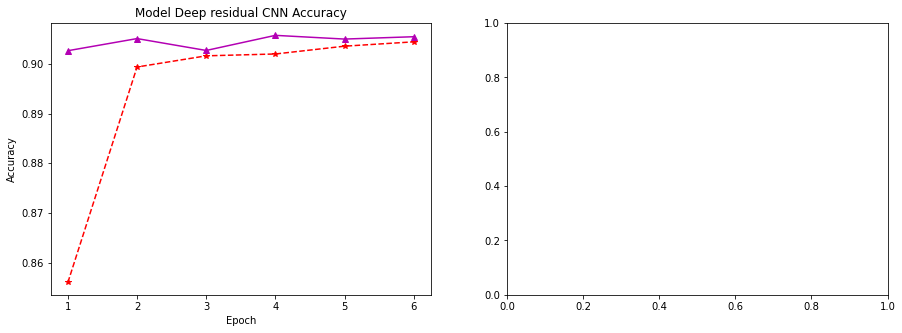

In [36]:
epochs = 6
batch_size = 256
history = model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    callbacks=[learning_rate_reduction, checkpoint] 
)

#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600, quality = 100, optimize = True)
    plt.show()

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

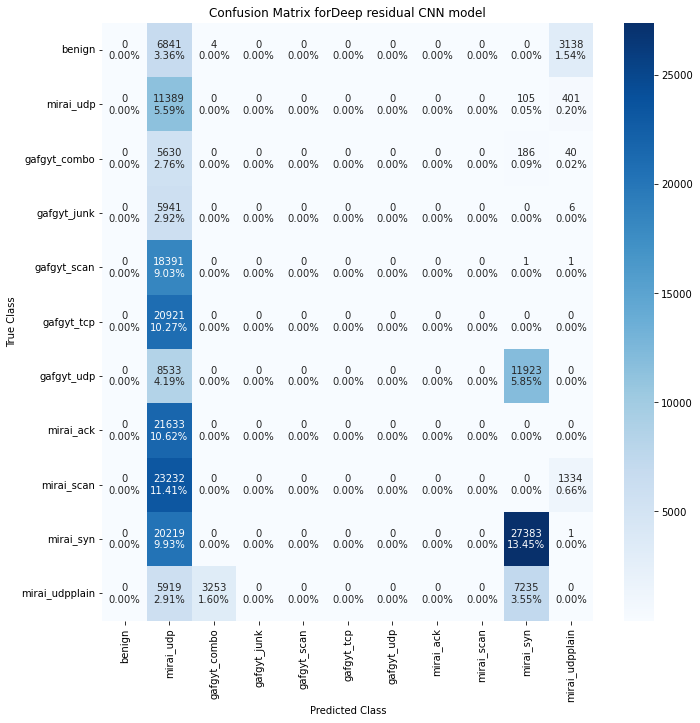

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = gru_model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(11,11)

label = ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']

plt.figure(figsize=(11,11))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()


In [ ]:
print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        benign       0.00      0.00      0.00      9983
     mirai_udp       0.08      0.96      0.14     11895
  gafgyt_combo       0.00      0.00      0.00      5856
   gafgyt_junk       0.00      0.00      0.00      5947
   gafgyt_scan       0.00      0.00      0.00     18393
    gafgyt_tcp       0.00      0.00      0.00     20921
    gafgyt_udp       0.00      0.00      0.00     20456
     mirai_ack       0.00      0.00      0.00     21633
    mirai_scan       0.00      0.00      0.00     24566
     mirai_syn       0.58      0.58      0.58     47603
mirai_udpplain       0.00      0.00      0.00     16407

      accuracy                           0.19    203660
     macro avg       0.06      0.14      0.07    203660
  weighted avg       0.14      0.19      0.14    203660

   8/6365 [..............................] - ETA: 50s - loss: 0.1715 - accuracy: 0.8984 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4228/6365 [==================>...........] - ETA: 10s - loss: 0.1414 - accuracy: 0.9072